In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

In [3]:
from lvo_cta.utils.data import CTADataset

Unable to find logging config yaml. Configuring fallback values


In [4]:
import matplotlib.pyplot as plt

In [ ]:
import sys
import json
import munch

with open("/home/users/shubham.kumar/projects/cta_lvo_classifier/configs/train_mca.json") as f:
    args = json.load(f)

args = munch.munchify(args)

In [74]:
data = CTADataset("test" , args)

test data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1036/1036 [00:00<00:00, 1150.25it/s]


test data : 772
positive_MCA_LVO_cases : 91
negative_MCA_LVO_cases : 681


test data: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1036/1036 [00:00<00:00, 1476.22it/s]

test data : 1512
positive_MCA_LVO_cases : 90
negative_MCA_LVO_cases : 650


In [64]:
len(data)

1512

In [27]:
data[0]['image'].shape

(392, 287)

In [31]:
data[0]['image'].shape

(261, 264)

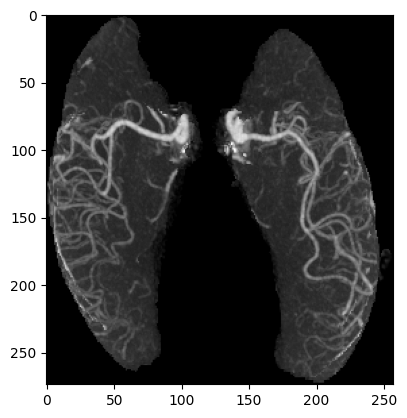

In [33]:
plt.imshow(data[10]['image'] ,cmap = "gray")
plt.show()

In [38]:
import h5py
from tqdm.auto import tqdm

In [36]:
data[0]

{'image': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'label': {'segmentation': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'classification': 0},
 'meta_info': {'study_uid': '1.2.840.113619.2.278.3.2433355041.61.1638098215.439',
  'series_uid': '1.2.840.113619.2.278.3.2433355041.61.1638098215.446',
  'tilt_corr': False,
  'isM1LVO': False,
  'isM2LVO': False,
  'slice_thickness': 1}}

In [65]:
for i in tqdm(range(len(data))) :
    series_uid = data[i]['meta_info']['series_uid']
    if not data[i]['meta_info']['tilt_corr'] : 
        h5f = h5py.File(f'/cache/fast_data_nas8/qer/shubham/mca_lvo/raw/{series_uid}.h5', 'w')
    else :
        h5f = h5py.File(f'/cache/fast_data_nas8/qer/shubham/mca_lvo/tilt_corr/{series_uid}.h5', 'w')
    h5f.create_dataset('image', data= data[i]['image'])
    h5f.create_dataset('mask', data= data[i]['label']['segmentation'])
    h5f.create_dataset('label', data= data[i]['label']['classification'])
    h5f.create_dataset('study_uid', data= data[i]['meta_info']['study_uid'])
    h5f.create_dataset('tilt_corr', data= data[i]['meta_info']['tilt_corr'])
    h5f.create_dataset('isM1LVO', data= data[i]['meta_info']['isM1LVO'])
    h5f.create_dataset('isM2LVO', data= data[i]['meta_info']['isM2LVO'])
    h5f.close()
        


  0%|          | 0/1512 [00:00<?, ?it/s]

In [70]:
li = []

In [75]:

for i in tqdm(range(len(data))) :
    meta_info = data[i]['meta_info']
    series_uid = meta_info['series_uid']
    study_uid = meta_info['study_uid']
    li.append({"SeriesUID" : series_uid , "StudyUID": study_uid , "tilt_corr":meta_info['tilt_corr']  ,"phase" : "test"})
    

  0%|          | 0/1512 [00:00<?, ?it/s]

In [78]:
import pandas as pd
df = pd.DataFrame.from_records(li)

In [85]:
#df.to_csv("/cache/fast_data_nas8/qer/shubham/mca_lvo/mca_lvo_dev_dataset.csv" , index =False)

In [82]:
series_uid = '1.3.12.2.1107.5.1.7.119239.30000022022305234270100001129'

In [83]:
df[df.SeriesUID == series_uid]

,SeriesUID,StudyUID,tilt_corr,phase
12291,1.3.12.2.1107.5.1.7.119239.3000002202230523427...,1.2.840.113711.3.22212.18520.667287991.26.2116...,False,val


In [84]:
df = df.drop(12291)

In [57]:
h5f = h5py.File(f'/cache/fast_data_nas8/qer/shubham/mca_lvo/raw/{series_uid}.h5', 'r')


In [60]:
c= h5f['mask']

In [61]:
c.shape

(304, 266)

In [41]:
h5f.close()

In [ ]:
h5f.create_dataset('dataset_1', data=a)



In [ ]:
h5f.close()


In [ ]:

logger.debug(f"h5py writing takes {time.time() - start_time}")
start_time = time.time()
f2 = h5py.File('data.h5', 'r')
c= f2['dataset_1']

In [14]:
import pandas as pd

In [7]:
from cta_atlas_new.utils.data import CTADataset

In [11]:
config = "/home/users/shubham.kumar/projects/cta_atlas_new/configs/unet_def.json"

In [12]:
import sys
import json
import munch

with open(config) as f:
    args = json.load(f)

args = munch.munchify(args)

In [46]:
cta_path = args.cta_path
dataframe = pd.read_csv(args.data_path)
dataset = dataframe.loc[
    (dataframe.Status == "train") & (dataframe.Ignore == False)
]
annotation_path_list = args.annotation_path



In [44]:
dataset

,StudyUID,Status,Ignore,LVO,Source,FlipZ,UpCrop,DownCrop,LeftCrop,RightCrop,NumSlices,DataSource,SeriesUID
0,1.2.840.113619.2.55.3.2831165752.385.150199069...,train,False,False,df1,False,79.0,440.0,98.0,392.0,235.0,indian,NaN
1,1.2.840.113619.2.55.3.2831165752.385.150199069...,train,False,False,df1,False,105.0,416.0,116.0,397.0,220.0,indian,NaN
2,1.2.840.113619.2.55.3.2831165752.372.150236593...,train,False,False,df1,False,90.0,433.0,106.0,396.0,230.0,indian,NaN
3,1.2.840.113619.2.55.3.2831165752.372.150236595...,train,False,True,df1,False,127.0,405.0,129.0,364.0,213.0,indian,NaN
5,1.2.840.113619.2.55.3.2831165752.174.150703867...,train,False,True,df1,False,112.0,422.0,110.0,398.0,222.0,indian,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,NaN,train,False,NaN,NaN,NaN,69.0,462.0,137.0,448.0,196.0,vrad,1.3.46.670589.33.1.63776541422018888600010.494...
970,NaN,train,False,NaN,NaN,NaN,35.0,434.0,104.0,397.0,119.0,vrad,1.3.46.670589.33.1.63774168221669892100001.506...
971,NaN,train,False,NaN,NaN,NaN,15.0,410.0,102.0,392.0,295.0,vrad,1.3.12.2.1107.5.1.4.155388.3000002201011012049...
973,NaN,train,False,NaN,NaN,NaN,42.0,448.0,105.0,416.0,209.0,vrad,1.2.840.113619.2.438.3.380435022.288.163725461...


In [45]:
annotation_path

['/home/users/shubham.kumar/mywork/indian_cta_data/cache/',
 '/data_nas5/qer/vrad_atlas_annotation/cache/']

In [19]:
cta_path

['/home/users/shubham.kumar/mywork/indian_cta_data/cache/cta/',
 '/data_nas5/qer/vrad_atlas_annotation/cache/cta']

In [42]:
annotation_path

'/'

In [23]:
dataset

,StudyUID,Status,Ignore,LVO,Source,FlipZ,UpCrop,DownCrop,LeftCrop,RightCrop,NumSlices,DataSource,SeriesUID
0,1.2.840.113619.2.55.3.2831165752.385.150199069...,train,False,False,df1,False,79.0,440.0,98.0,392.0,235.0,indian,NaN
1,1.2.840.113619.2.55.3.2831165752.385.150199069...,train,False,False,df1,False,105.0,416.0,116.0,397.0,220.0,indian,NaN
2,1.2.840.113619.2.55.3.2831165752.372.150236593...,train,False,False,df1,False,90.0,433.0,106.0,396.0,230.0,indian,NaN
3,1.2.840.113619.2.55.3.2831165752.372.150236595...,train,False,True,df1,False,127.0,405.0,129.0,364.0,213.0,indian,NaN
5,1.2.840.113619.2.55.3.2831165752.174.150703867...,train,False,True,df1,False,112.0,422.0,110.0,398.0,222.0,indian,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,NaN,train,False,NaN,NaN,NaN,69.0,462.0,137.0,448.0,196.0,vrad,1.3.46.670589.33.1.63776541422018888600010.494...
970,NaN,train,False,NaN,NaN,NaN,35.0,434.0,104.0,397.0,119.0,vrad,1.3.46.670589.33.1.63774168221669892100001.506...
971,NaN,train,False,NaN,NaN,NaN,15.0,410.0,102.0,392.0,295.0,vrad,1.3.12.2.1107.5.1.4.155388.3000002201011012049...
973,NaN,train,False,NaN,NaN,NaN,42.0,448.0,105.0,416.0,209.0,vrad,1.2.840.113619.2.438.3.380435022.288.163725461...


In [36]:
from pydicom import dcmread
import numpy as np

In [59]:
import h5py
from tqdm.auto import tqdm

In [63]:
for idx in tqdm(dataset.index) :
    row = dataset.loc[idx]
    if row.DataSource == "indian":
        uid = row.StudyUID
        filepath = os.path.join(cta_path[0], str(uid))
        annotation_path = annotation_path_list[0]
        h5f = h5py.File(f'/cache/fast_data_nas8/qer/shubham/cta_icv_vt/{uid}.h5', 'w')
        h5f.create_dataset('image', data= dcm_to_arr(filepath))
        h5f.create_dataset('icv', data= dcm_to_arr(os.path.join(annotation_path, "icv", uid)))

    if row.DataSource == "vrad":
        uid = row.SeriesUID
        filepath = os.path.join(cta_path[1], str(uid))
        annotation_path = annotation_path[1]
        h5f = h5py.File(f'/cache/fast_data_nas8/qer/shubham/cta_icv_vt/{uid}.h5', 'w')
        h5f.create_dataset('image', data= dcm_to_arr(filepath))
    
        
    h5f.create_dataset('left_mca', data= dcm_to_arr(os.path.join(annotation_path, "left_mca", uid)))
    h5f.create_dataset('right_mca', data= dcm_to_arr(os.path.join(annotation_path, "right_mca", uid)))
#         h5f.create_dataset('left_hemi', data= dcm_to_arr(os.path.join(annotation_path, "left_hemi", uid)))
#         h5f.create_dataset('right_hemi', data= dcm_to_arr(os.path.join(annotation_path, "right_hemi", uid)))
    h5f.create_dataset('left_ica_atlas', data= dcm_to_arr(os.path.join(annotation_path, "left_ica_atlas", uid)))
    h5f.create_dataset('right_ica_atlas', data= dcm_to_arr(os.path.join(annotation_path, "right_ica_atlas", uid)))
    h5f.create_dataset('posterior', data= dcm_to_arr(os.path.join(annotation_path, "posterior", uid)))
    h5f.create_dataset('aca', data= dcm_to_arr(os.path.join(annotation_path, "aca", uid)))

    h5f.close()


  0%|          | 0/710 [00:00<?, ?it/s]

int16 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
bool 1.2.840.113619.2.55.3.2831165752.385.1501990693.536
int16 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
bool 1.2.840.113619.2.55.3.2831165752.385.1501990696.337
int16 1.2.840.113619.2.55.3.2831165752.372.1502365939.877
bool 1.2.840.113619.2.55.3.2

KeyboardInterrupt: 

In [61]:
def dcm_to_arr(filepath):
    filenames = []
    for slice_ in range(len(os.listdir(filepath))):
        slice_num = (3 - len(str(slice_))) * "0" + str(slice_)
        data_path = os.path.join(filepath, f"image_{slice_num}.dcm")
        filenames.append(data_path)
    arr_list = [dcmread(dcm_path).pixel_array for dcm_path in filenames]
    arr = np.array(arr_list)
    if len(np.unique(arr)) == 2 :
        arr = arr.astype('bool')
    print(arr.dtype , os.path.basename(filepath))
    return arr

In [62]:
h5f.close()

In [5]:
os.listdir("/cache/fast_data_nas8/qer/shubham/mca_lvo/raw/")

['1.2.840.113619.2.428.3.2013969651.829.1638364186.971.h5',
 '1.2.840.113619.2.278.3.1745546608.890.1638261575.574.3.h5',
 '1.3.46.670589.33.1.63774155468747352700001.4654874612640182410.h5',
 '1.2.392.200036.9116.2.6.1.3268.2056548592.1638448519.731660.h5',
 '1.2.840.113619.2.340.3.3523929760.337.1643812548.191.4.h5',
 '1.2.840.113619.2.428.3.296491132.631.1643081477.842.3.h5',
 '1.3.12.2.1107.5.1.4.73430.30000022010711395395400029827.h5',
 '1.2.840.113704.1.111.6484.1638403865.53.h5',
 '1.2.840.113619.2.358.3.2517286414.607.1641014754.47.5.h5',
 '1.2.840.113619.2.340.3.2416587764.358.1643779072.949.3.h5',
 '1.3.12.2.1107.5.1.4.65683.30000022013112071976000035415.h5',
 '1.3.46.670589.33.1.63779683905375727800003.5182856838165890738.h5',
 '1.2.840.113619.2.428.3.296506492.404.1640615837.849.3.h5',
 '1.2.840.113619.2.428.3.2013969651.560.1641128634.754.h5',
 '1.3.12.2.1107.5.1.4.64501.30000022020109180695100026527.h5',
 '1.2.840.113619.2.467.3.17435142.636.1638446280.64.7.h5',
 '1.3.12.

In [7]:
import h5py
h5f = h5py.File(f'/cache/fast_data_nas8/qer/shubham/mca_lvo/raw/1.3.12.2.1107.5.1.4.64501.30000022020109180695100026527.h5', 'r')



In [14]:
import numpy as np

In [15]:
np.array(h5f["label"])

array(0)

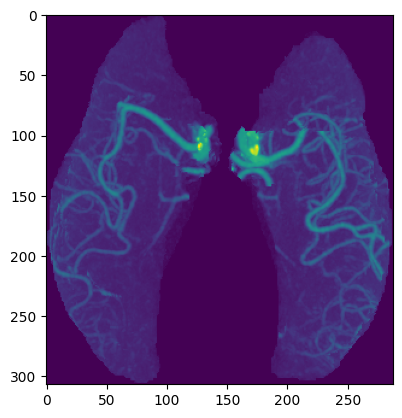

In [10]:
plt.imshow(h5f["image"])
plt.show()